In [11]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [12]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [13]:
key = os.environ.get('AZURE_SEARCH_KEY', '0b1978330b8341fea3220b22c5cf7f57')

In [14]:
results = search_images_bing(key, 'Rolex')
ims = results.attrgot('contentUrl')
len(ims)

150

In [15]:
watches = 'Rolex','Patek Philippe','Richard Mille'
path = Path('watches')

In [16]:
if not path.exists():
    path.mkdir()
    for o in watches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f"{o} watches")
        download_images(dest, urls=results.attrgot('contentUrl'))

In [18]:
fns = get_image_files(path)
fns

(#429) [Path('watches/Richard Mille/00000047.jpg'),Path('watches/Richard Mille/00000055.jpg'),Path('watches/Richard Mille/00000107.jpg'),Path('watches/Richard Mille/00000036.jpg'),Path('watches/Richard Mille/00000030.jpg'),Path('watches/Richard Mille/00000097.jpg'),Path('watches/Richard Mille/00000148.jpg'),Path('watches/Richard Mille/00000110.jpg'),Path('watches/Richard Mille/00000029.jpg'),Path('watches/Richard Mille/00000112.jpg')...]

In [19]:
failed = verify_images(fns)
failed

(#1) [Path('watches/Richard Mille/00000122.jpg')]

In [20]:
failed.map(Path.unlink);

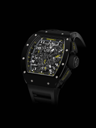

In [22]:
im = Image.open('watches/Richard Mille/00000047.jpg')
im.to_thumb(128,128)

In [24]:
watches = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [25]:
dls = watches.dataloaders(path)

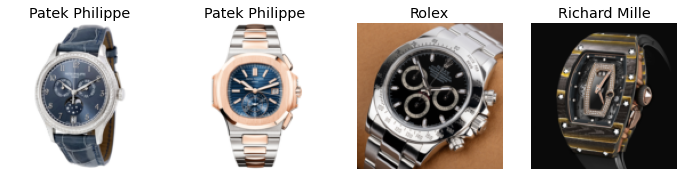

In [26]:
dls.valid.show_batch(max_n=4, nrows=1)

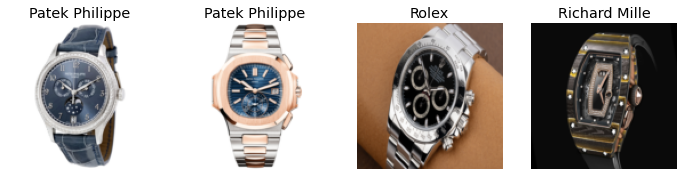

In [29]:
watches = watches.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

Could not do one pass in your dataloader, there is something wrong in it


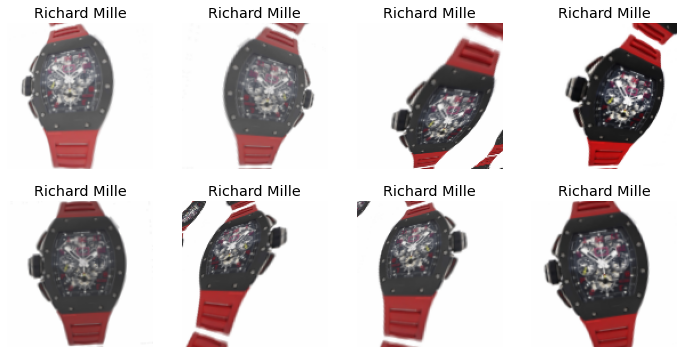

In [30]:
watches = watches.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = watches.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [31]:
watches = watches.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = watches.dataloaders(path)

In [41]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.537877,0.353739,0.152941,00:13


epoch,train_loss,valid_loss,error_rate,time
0,0.694330,0.269492,0.141176,00:12
1,0.552835,0.156254,0.070588,00:13
2,0.450757,0.104494,0.035294,00:13
3,0.374874,0.098736,0.035294,00:12


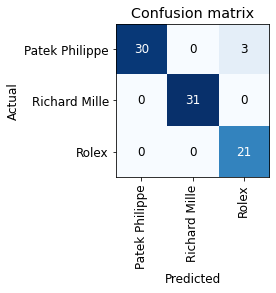

In [42]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

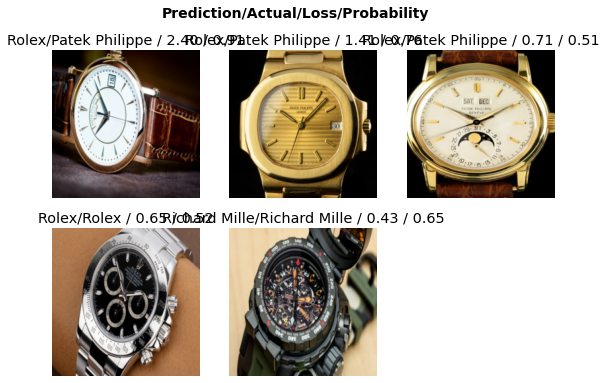

In [43]:
interp.plot_top_losses(5, nrows=2)

In [44]:
learn.export()

In [45]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [46]:
learn_inf = load_learner(path/'export.pkl')

In [47]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

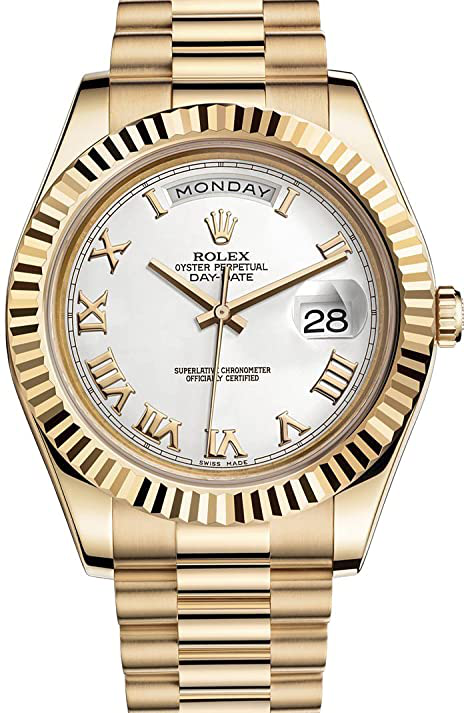

In [49]:
img = PILImage.create(btn_upload.data[-1])
img

In [50]:
#hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [51]:
pred,pred_idx,probs = learn_inf.predict(img)

In [52]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: Rolex; Probability: 0.9925')

In [53]:
#hide_output
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [54]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [55]:
#hide
#Putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()

In [57]:
#hide_output
VBox([widgets.Label('Select your watch!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [58]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.7 MB 19.1 MB/s eta 0:00:01
     |████████████████████████████████| 557 kB 26.9 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 35.6 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 396 kB 27.2 MB/s eta 0:00:01
     |████████████████████████████████| 79 kB 12.4 MB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nbdev 1.1.23 requires nbconvert<6, but you have nbconvert 6.4.0 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/etc/jupyter
    - Validating...
      voila 0.3.0 OK
